# Image Processing SS 18 - Assignment 06

### DRAFT - Deadline is 31.05.2018 at 08:00 a.m. CEST 

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.io.wavfile
from skimage.data import astronaut
from skimage.color import rgb2gray

from __future__ import division
import random
try:
    from StringIO import StringIO as BytesIO
except ImportError:
    from io import BytesIO
    
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
    
    
from PIL import Image
import itertools
import IPython

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 0 - Crosscorrelation - 2 Points
Implement a function myCrossCorrelation, which gets two discrete functions in the form of arrays as an input and outputs the resulting crosscorrelation function. No apply your correlation function as follows: 
a) use as input function 1 one of your group member's enrollment number, function 2 shall be [1], plot the two functions and the result of the crosscorrelation of both. 
b) use the same function 1 as in a), function b) shall be [1 2 1]. Plot the two functions and the crosscorrelation of both.

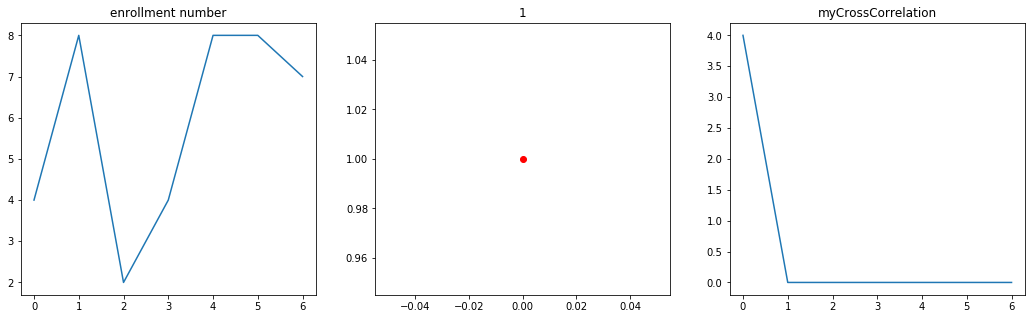

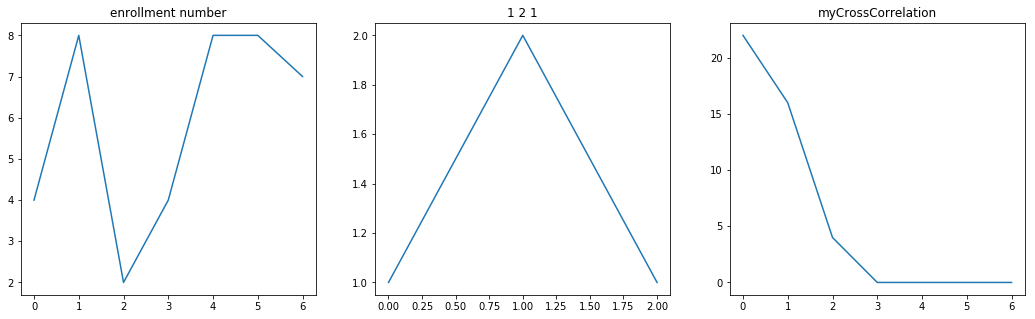

In [3]:
def myCrossCorrelation(f, g):
    v = np.zeros(np.shape(f))
    for n in range(0,len(f)):
        for m in range(0,len(f)):
            
            #in case g is shorter than f to not get out of range
            if m+n>len(g)-1:
                x=0
            else:
                x=g[m+n]
            
            #the actual computation
            v[n] += np.conj(f[m])*x
            
    #return np.correlate(f,g)
    return v


plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot([4,8,2,4,8,8,7])
plt.title("enrollment number")
plt.subplot(132)
plt.plot([1],'ro')
plt.title("1")
plt.subplot(133)
plt.plot(myCrossCorrelation([4,8,2,4,8,8,7],[1]))
plt.title("myCrossCorrelation")
plt.show()

plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot([4,8,2,4,8,8,7])
plt.title("enrollment number")
plt.subplot(132)
plt.plot([1,2,1])
plt.title("1 2 1")
plt.subplot(133)
plt.plot(myCrossCorrelation([4,8,2,4,8,8,7],[1,2,1]))
plt.title("myCrossCorrelation")
plt.show()


# Exercise 1 - Discrete Fourier Transformation - 3 Points
Implement the Discrete Fourier Transfromation with [Matrix Multiplication](https://en.wikipedia.org/wiki/DFT_matrix).

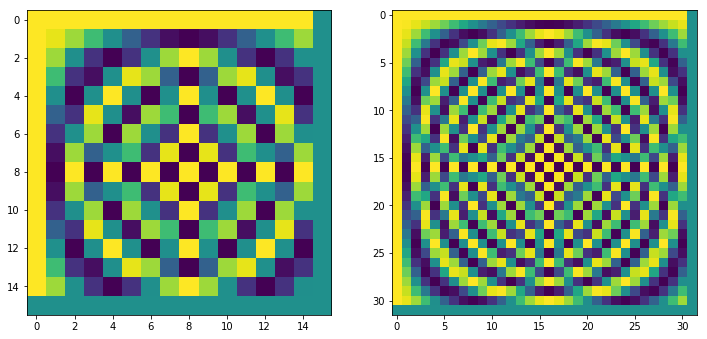

In [4]:
def dft_matrix(n):
    """
    Returns the Discrete Fourier Transformation Matrix of order `n`.
    """
    dft = np.zeros((n,n))
    omega = np.exp(((-2)*np.pi*(0+1j))/n)
    
    for row in range(0,n-1):
        for element in range(0,n-1):
            dft[row][element]=np.real((omega**(row*element))/np.sqrt(n))
        
    return dft


plt.subplot(121)
plt.imshow(dft_matrix(16))
plt.subplot(122)
plt.imshow(dft_matrix(32))
plt.show()

# Exercise 2 - Spectrogram - 5 Points

A [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) visualises the intensities of the differnent frequencies over time. On the x-axis is the time and on the y-axis are the frequencies. 
Your task is to build the spectrogram of the given audio clip. If you failed to do exercise 1, you can use some library for the fourier transformation.

In [5]:
def load_wav(url):
    f = urllib2.urlopen(url)
    buffer = BytesIO(f.read())
    sample_rate, audio = scipy.io.wavfile.read(buffer)
    if len(audio.shape) == 2:
        # only select one channel
        audio = audio[:, 0]
    return sample_rate, audio / audio.max()

In [6]:
delphines_url = "http://www.pmel.noaa.gov/acoustics/whales/sounds/whalewav/akhumphi1x.wav"
classic_url = "http://download.naimlabel.com/test/95ffbfec-d57f-4ba8-9fa8-f5c9da56759a.aspx"
# you can choose between delphine sounds and some classic music.
sample_rate, audio = load_wav(delphines_url)

In [7]:
print(audio.shape)

(377006,)


In [8]:
# listen to the audio
IPython.display.Audio(data=audio, rate=sample_rate)

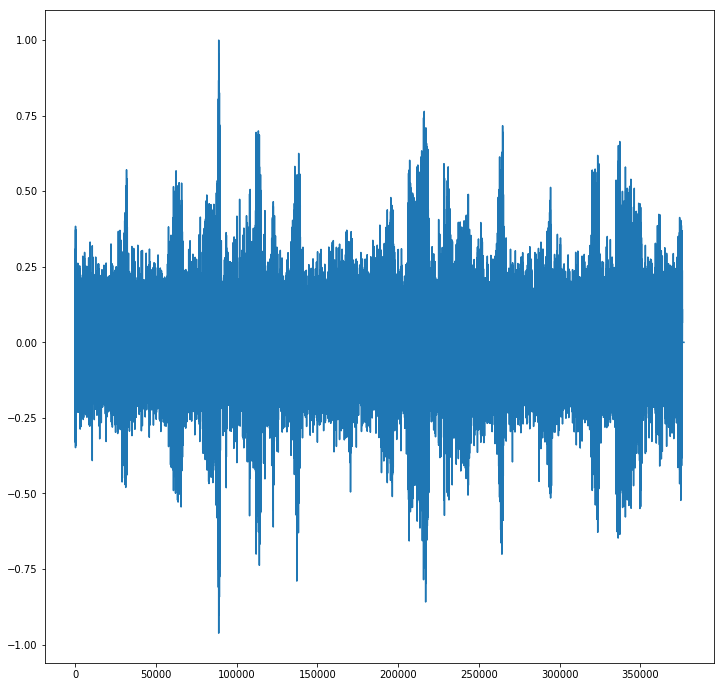

In [9]:
# plot the values.
plt.plot(audio)
plt.show()

In [10]:
def spectogram(audio, window_size=500):
    """
    Builds the spectogram of the audio clip. Split the audio clip into buckets of `window_size` and 
    use the discrete fourier transformation to get the intensity of the frequencies.
    The entery at position (i, j) of the matrix stands for the intensity of the i-th frequencies in the j-th bucket.
    """
    #cuts a few bits off of the audio file so it fits the window size
    audio = audio[0:((len(audio)//window_size)*window_size)]
    shaped_audio = np.reshape(audio,(len(audio)//window_size, window_size))
    r = np.zeros((len(audio)//window_size,window_size//2))
    fourier = dft_matrix(window_size-1)
 
    for e in range(0,len(shaped_audio)):
        #only half the range is sufficient because it's mirrored otherwise
        for k in range(0,(window_size//2)-1):
            x=0
            for n in range(0,window_size-1):
                x+=(shaped_audio[e][n]*fourier[k][n])/np.sqrt(window_size)
                r[e][k]=x

    return np.transpose(np.absolute(r))


In [11]:
specgram = spectogram(audio, window_size=500)


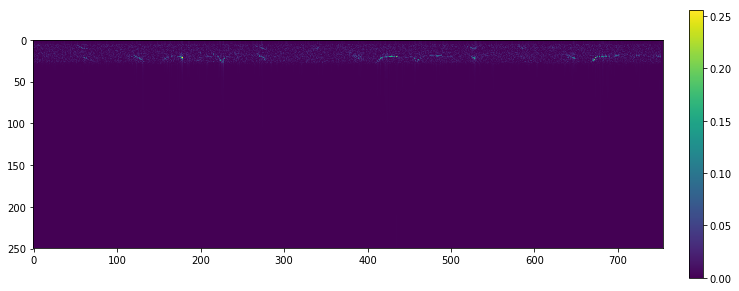

In [12]:
im = plt.imshow(specgram)
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


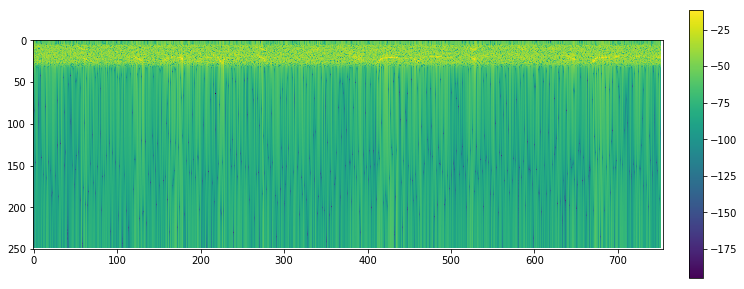

In [13]:
speclog = 20 * np.log10(specgram)

im = plt.imshow(speclog)    # your code here
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()